# 02. Neural Network Classification with TensorFlow

Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a classification model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
    - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and mutliclass classification
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
      - Finding the best learning rate
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
  - Improving a model
- The power of non-linearity
- Evaluating classification models
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)

## How you can use this notebook

You can read through the descriptions and the code (it should all run, except for the cells which error on purpose), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Creating data to work for classification problem
from sklearn.datasets import make_circles

#make 1000 example
n_samples=1000

#create X, y
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
x[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
y[:5]

array([1, 1, 1, 1, 0])

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
circles_df = pd.DataFrame({'X0':x[:,0], 'X1':x[:,1], 'Y':y})
circles_df

,X0,X1,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


[]

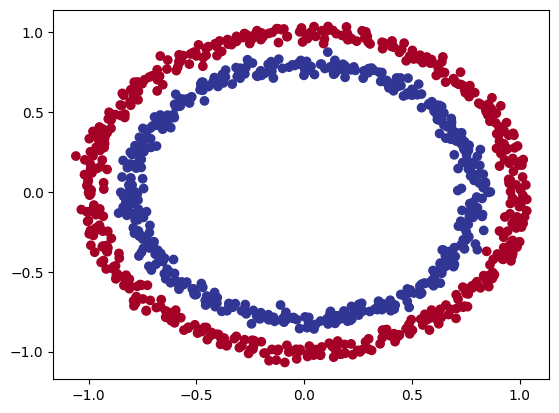

In [ ]:
#plot the points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.plot()

In [ ]:
# shape of x and y
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
x[4], y[4]

(array([ 0.44220765, -0.89672343]), 0)

In [ ]:
# the x and y are numpy arrays
type(x), type(y), x.shape, y.shape

(numpy.ndarray, numpy.ndarray, (1000, 2), (1000,))

Steps in modelling

🔑**Note:** if you don't explicitly define the input shape then by default the shape is expected to be of 2 dimension.

In [ ]:
tf.random.set_seed=42

## our data is numpy arrays, which works very well with model

# 1. Create a model
model = tf.keras.Sequential([
          #tf.keras.layers.Input(shape=(2)),
          tf.keras.layers.Dense(1),
          #tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

# 3. Fit model
history = model.fit(x, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 4.8962 - accuracy: 0.4710
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 6.0772 - accuracy: 0.5350
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 5.7469 - accuracy: 0.5750
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 5.4834 - accuracy: 0.5790
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 5.3300 - accuracy: 0.5460
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 5.3303 - accuracy: 0.5430
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 5.3282 - accuracy: 0.5450
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 5.3277 - accuracy: 0.5490
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 5.3383 - accuracy: 0.5450
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 5.3283 - accuracy: 0.5430


50% accuracy means the model is just guessing

In [ ]:
history = model.fit(x, y, epochs=100, verbose=0)
model.evaluate(x, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4540


[0.6932262778282166, 0.45399999618530273]

## Add one more layer

In [ ]:
tf.random.set_seed=42

## our data is numpy arrays, which works very well with model

# 1. Create a model
model = tf.keras.Sequential([
          #tf.keras.layers.Input(shape=(2)),
          tf.keras.layers.Dense(1),
          tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

# 3. Fit model
history = model.fit(x, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 4ms/step - loss: 1.1622 - accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.4960
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4610
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4880
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4970
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4900
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4530
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.5190
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4810


In [ ]:
model.evaluate(x, y)

32/32 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5180


[0.6932585835456848, 0.5180000066757202]

Still 50%

Note our model is linear while our test data is cicles

## Add one more layer, increase neurons to 100, change optimizer to Adam

In [ ]:
tf.random.set_seed=42

## our data is numpy arrays, which works very well with model

# 1. Create a model
model1 = tf.keras.Sequential([
          tf.keras.layers.Input(shape=(2)),
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])
print(model1.summary())

# 2. Compile model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

# 3. Fit model
history1 = model1.fit(x, y, epochs=100, verbose=0)

# 4.evaluate
print("="*80)
print("Model Evalaution")
print("="*80)
model1.evaluate(x, y)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               300       
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________
None
Model Evalaution
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5180


[0.6936953663825989, 0.5180000066757202]

In [ ]:
model1.predict(x[:5])

1/1 [==============================] - 0s 101ms/step


array([[0.53225774],
       [0.4820964 ],
       [0.4790793 ],
       [0.47044742],
       [0.5724643 ]], dtype=float32)

Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

> 🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:
* Takes in a trained model, features (`X`) and labels (`y`).
* Creates a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.

> 🔑 **Note:** If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [ ]:
# import numpy as np

# def plot_decision_boundary(model, X, y):
#   """
#   Plots the decision boundary created by a model predicting on X.
#   This function has been adapted from two phenomenal resources:
#    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
#    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
#   """
#   # Define the axis boundaries of the plot and create a meshgrid
#   x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
#   y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
#   xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                        np.linspace(y_min, y_max, 100))

#   # Create X values (we're going to predict on all of these)
#   x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

#   # Make predictions using the trained model
#   y_pred = model.predict(x_in)

#   # Check for multi-class
#   if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
#     print("doing multiclass classification...")
#     # We have to reshape our predictions to get them ready for plotting
#     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
#   else:
#     print("doing binary classifcation...")
#     y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

#   # Plot decision boundary
#   plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
#   plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
#   plt.xlim(xx.min(), xx.max())
#   plt.ylim(yy.min(), yy.max())

In [ ]:
def plot_decision_boundary(model, x, y):
    """
    Plots decision boundary created by a model predicting on x
    """

    #dfine the axis boundary and create the mesh grid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    #feature1 and feature2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # create x value
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # make predictions
    y_pred = model.predict(x_in)

    #check fpr multi_class
    if len(y_pred[0])>1:
        print("Doing multi class classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    #plot the decision
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

#plot_decision_boundary(model, x, y)

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:,0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 0].max() + 0.1
print(x_min, x_max, y_min, y_max)

-1.1595024599098636 1.1337117525463374 -1.1677683182718437 1.1337117525463374


313/313 [==============================] - 0s 1ms/step
Doing binary classification


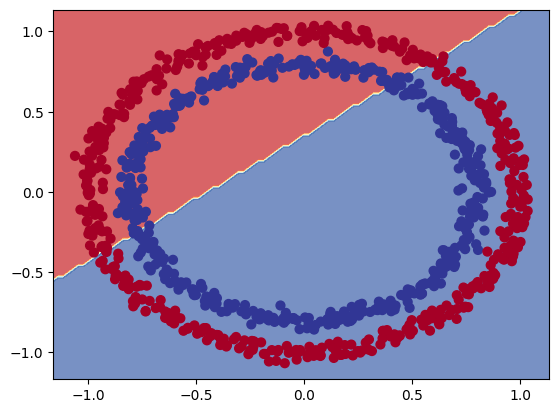

In [ ]:
plot_decision_boundary(model1, x, y)

Still 50%

so our model is linear one and trying to draw a straight to line. So ideally this should work for regression data.lets check that

In [ ]:
tf.random.set_seed=42

# Create some regression data
x_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)

print(x_reg.shape, y_reg.shape)

#Split our regression data
x_reg_train = x_reg[:150]
x_reg_test = x_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

print(x_reg_train.shape, x_reg_test.shape, y_reg_train.shape, y_reg_test.shape )
print(type(x_reg_train), type(x_reg_test), type(y_reg_train), type(y_reg_test))

(200,) (200,)
(150,) (50,) (150,) (50,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
tf.random.set_seed=42

# 1. Create a model
model1 = tf.keras.Sequential([
          #if you don't explicitly define the input shape then by default the shape is expected to be of 2 dimension.
          # while our input here is one dim
          tf.keras.layers.Input(shape=(1,)),
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])
print(model1.summary())

# 2. Compile model
model1.compile(#loss=tf.keras.losses.BinaryCrossentropy(),
               loss='mae',
              optimizer='adam',
              metrics=['mae'])

# 3. Fit model
history1 = model1.fit(x_reg_train, y_reg_train, epochs=10)

# 4.evaluate
print("="*80)
print("Model Evalaution")
print("="*80)
model1.evaluate(x_reg_test, y_reg_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               200       
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 630.7632 - mae: 630.7632
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 505.1694 - mae: 505.1694
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 386.2607 - mae: 386.2607
Epoch 4/10
5/5 [==========

[22.112062454223633, 22.112062454223633]

In [ ]:
y_pred = model1.predict(x_reg_test)

2/2 [==============================] - 0s 5ms/step


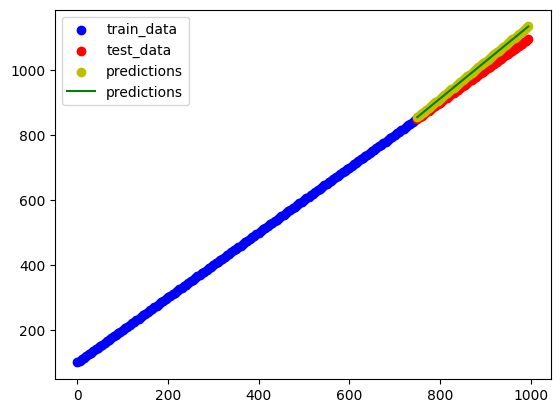

In [ ]:
plt.scatter(x_reg_train, y_reg_train, c='b', label='train_data')
plt.scatter(x_reg_test, y_reg_test, c='r', label='test_data')
plt.scatter(x_reg_test, y_pred, c='y',label='predictions')
plt.plot(x_reg_test, y_pred, c='g',label='predictions')
plt.legend()
plt.show()

So missing peice in our classification modelling was non-linearlity.
Change activation to non linear, try sigmoid

In [ ]:
tf.random.set_seed=42

## our data is numpy arrays, which works very well with model

# 1. Create a model
model2 = tf.keras.Sequential([
          tf.keras.layers.Input(shape=(2)),
          tf.keras.layers.Dense(100, activation='sigmoid'),
          tf.keras.layers.Dense(10, activation='sigmoid'),
          tf.keras.layers.Dense(1)
])
#print(model2.summary())

# 2. Compile model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

# 3. Fit model
history2 = model2.fit(x, y, epochs=100, verbose=0)

# 4.evaluate
print("="*80)
print("Model Evalaution")
print("="*80)
model2.evaluate(x, y)

Model Evalaution
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4780


[0.6931947469711304, 0.4779999852180481]

313/313 [==============================] - 1s 3ms/step
Doing binary classification


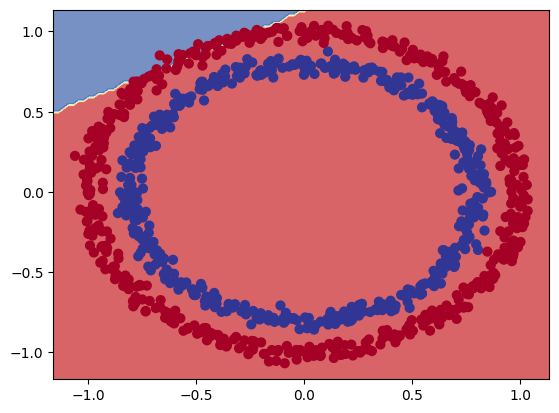

In [ ]:
plot_decision_boundary(model2, x, y)

In [ ]:
[l for l in model1.layers]

In [ ]:
[l.output for l in model1.layers]

[<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_3')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_5')>]

In [ ]:
model1.predict([[0.75424625, 0.23148074]])

1/1 [==============================] - 0s 83ms/step


array([[0.5322578]], dtype=float32)

In [ ]:
model1.predict(x[:10])

1/1 [==============================] - 0s 27ms/step


array([[0.53225774],
       [0.4820964 ],
       [0.4790793 ],
       [0.47044745],
       [0.5724643 ],
       [0.46813977],
       [0.47894186],
       [0.536679  ],
       [0.54601896],
       [0.4651858 ]], dtype=float32)

## Adding activation 'sigmoid' in output layer, which is necessary as our classification is binary

Model Evalaution
313/313 [==============================] - 0s 1ms/step
Doing binary classification


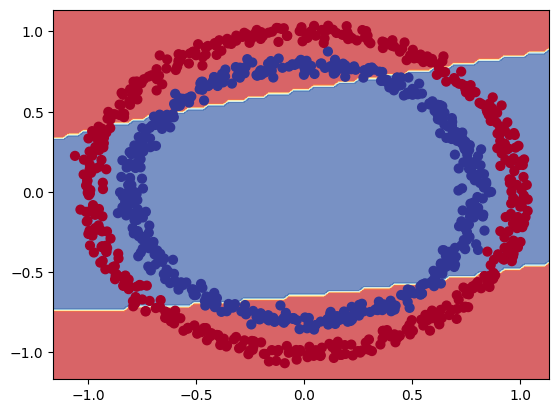

In [ ]:
tf.random.set_seed=42

## our data is numpy arrays, which works very well with model

# 1. Create a model
model2_ = tf.keras.Sequential([
          tf.keras.layers.Input(shape=(2)),
          tf.keras.layers.Dense(100, activation='sigmoid'),
          tf.keras.layers.Dense(10, activation='sigmoid'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])
#print(model2.summary())

# 2. Compile model
model2_.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

# 3. Fit model
history2_ = model2_.fit(x, y, epochs=100, verbose=0)

# 4.evaluate
print("="*80)
print("Model Evalaution")
print("="*80)
model2_.evaluate(x, y)

#plot decision boundary
plot_decision_boundary(model2_, x, y)

In [ ]:
model2_.predict(x[:10])

1/1 [==============================] - 0s 27ms/step


array([[0.56852484],
       [0.5427222 ],
       [0.5380144 ],
       [0.47330555],
       [0.43981704],
       [0.47263718],
       [0.4687422 ],
       [0.5698011 ],
       [0.47465664],
       [0.43121555]], dtype=float32)

We observe sigmoid activation in hidden layers not working great

## Try relu

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.4910
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5000
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5000
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5000
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5010
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6260
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.7710
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.8160
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7940
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.9750
Epoch 11/50
32/32 [

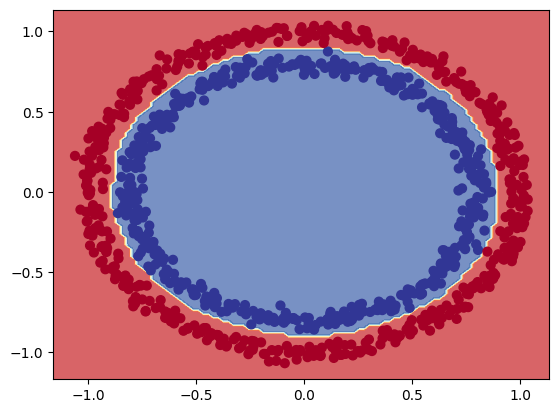

In [ ]:
tf.random.set_seed=42

## our data is numpy arrays, which works very well with model

# 1. Create a model
model3 = tf.keras.Sequential([
          #Note: if you don't explicitly define the input shape then by default the shape is expected to be of 2 dimension.
          tf.keras.layers.Input(shape=(2)),
          tf.keras.layers.Dense(100, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])
#print(model3.summary())

# 2. Compile model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

# 3. Fit model
history3 = model3.fit(x, y, epochs=50)

# 4.evaluate
print("="*80)
print("Model Evalaution")
print("="*80)
model3.evaluate(x, y)

#plot decision boundary
plot_decision_boundary(model3, x, y)

In [ ]:
model3.predict(x[:10])

1/1 [==============================] - 0s 21ms/step


array([[0.9883592 ],
       [0.9979938 ],
       [0.9663956 ],
       [0.9886494 ],
       [0.00486463],
       [0.9489355 ],
       [0.9829848 ],
       [0.99104124],
       [0.99037075],
       [0.00160699]], dtype=float32)

## Change optimizer learning rate to 0.01

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.4910
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6820
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.6890
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.8590
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.9420
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2249 - accuracy: 0.9840
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1705 - accuracy: 0.9890
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1311 - accuracy: 0.9930
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9960
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0946 - accuracy: 0.9950
Epoch 11/20
32/32 [

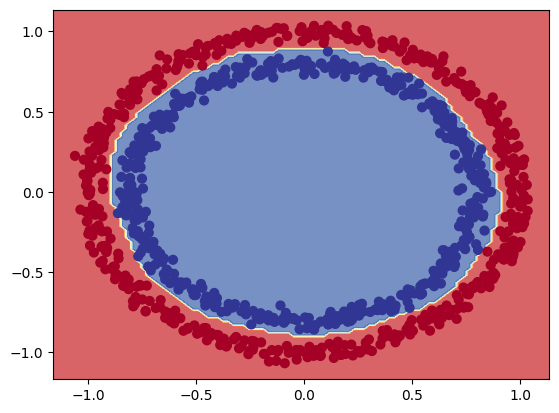

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed=42

## our data is numpy arrays, which works very well with model

# 1. Create a model
model4 = tf.keras.Sequential([
          #Note: if you don't explicitly define the input shape then by default the shape is expected to be of 2 dimension.
          tf.keras.layers.Input(shape=(2)),
          tf.keras.layers.Dense(100, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])
#print(model3.summary())

# 2. Compile model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# 3. Fit model
history4 = model4.fit(x, y, epochs=20)

# 4.evaluate
print("="*80)
print("Model Evalaution")
print("="*80)
model4.evaluate(x, y)

#plot decision boundary
plot_decision_boundary(model4, x, y)

We observe the default works better, accuracy graph looks little shaky but then its stable

<Axes: >

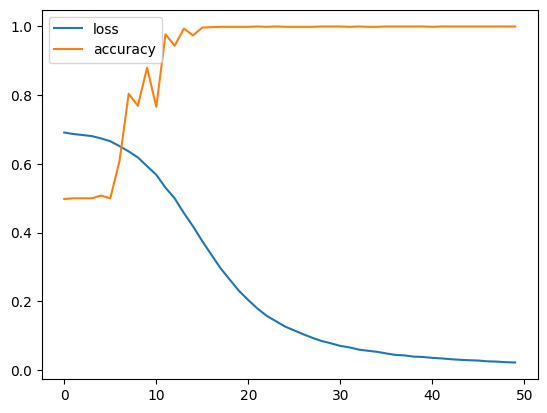

In [ ]:
pd.DataFrame(history3.history).plot()

<Axes: >

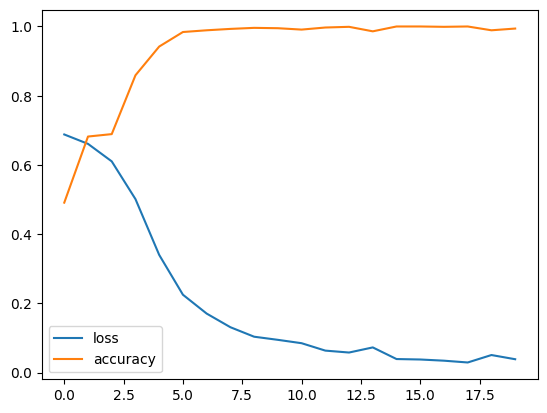

In [ ]:
pd.DataFrame(history4.history).plot()

## Non- linearity: Activation functions

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

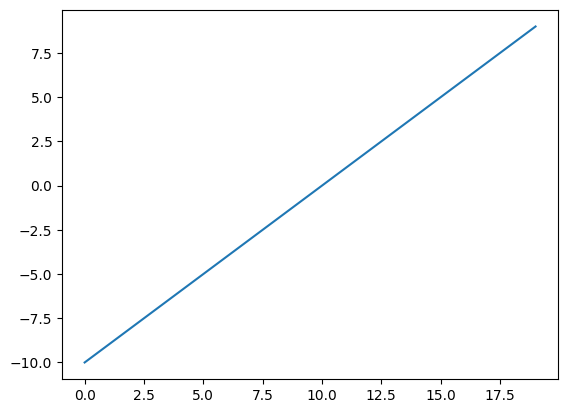

In [ ]:
# Visualize toy tensor
plt.plot(A)

## Sigmoid


In [ ]:
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [ ]:
def sigmoid(z):
    return 1 / (1+ tf.exp(-z))

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

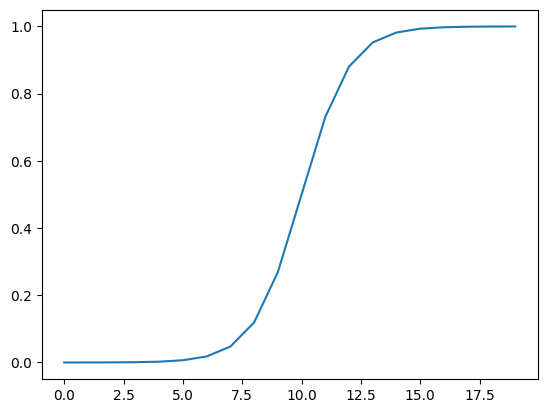

In [ ]:
plt.plot(sigmoid(A))

## Relu

In [ ]:
def relu(z):
    return tf.maximum(0, z)


In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

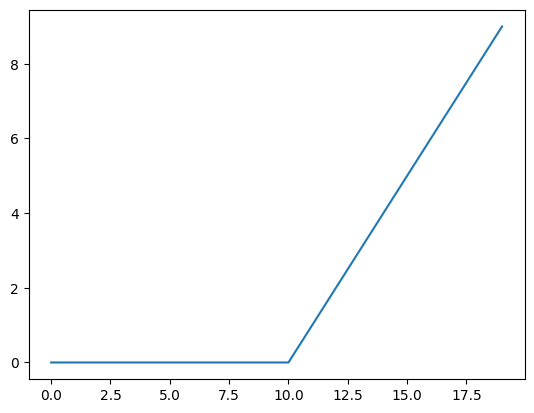

In [ ]:
plt.plot(relu(A))

## Linear

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
tf.keras.activations.linear(A) #returns same thing

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

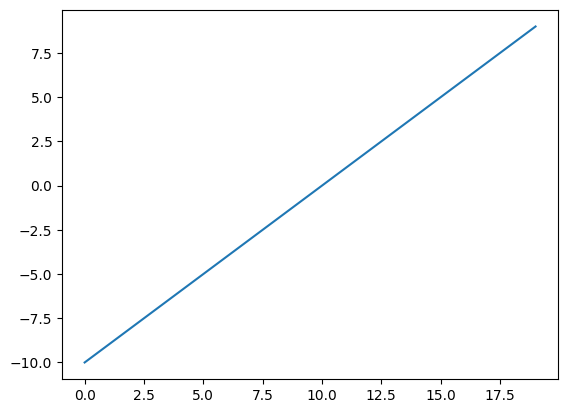

In [ ]:
plt.plot(tf.keras.activations.linear(A))


## Tanh

In [ ]:
def tanh(z):
    exp_z = tf.exp(z)
    exp_nz = tf.exp(-z)
    return (exp_z - exp_nz) / (exp_z + exp_nz)

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
tanh(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)>

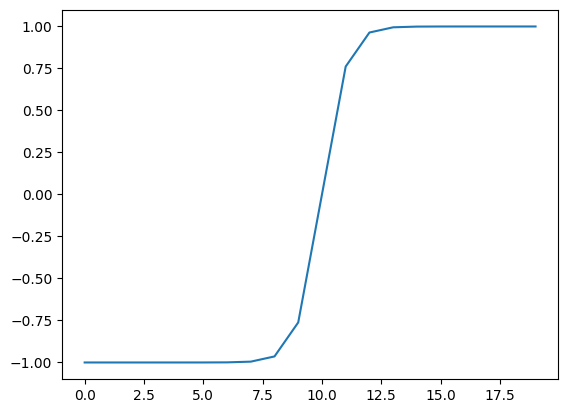

In [ ]:
plt.plot(tanh(A))

## Evaluating and improving the classification

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
x[:2], y[:2]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888]]),
 array([1, 1]))

In [ ]:
x_train = x[:800]
x_test = x[800:]
y_train = y[:800]
y_test = y[800:]

In [ ]:
tf.random.set_seed=42


model_5 = tf.keras.Sequential([
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])

history_5 = model_5.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5125
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.5800
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7563
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.9075
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9775
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9912
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 1.0000
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9987
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9987
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9962
Epoch 11/25
25/25 [

In [ ]:
#evaluate
model_5.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000


[0.0028761299327015877, 1.0]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


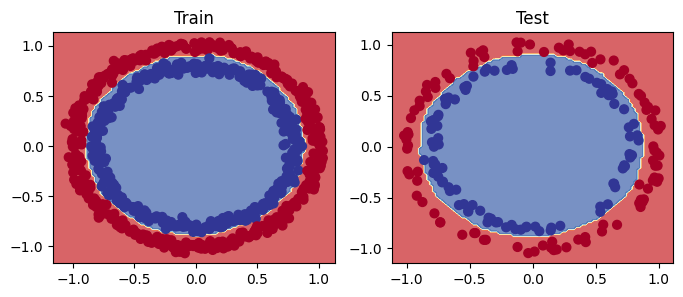

In [ ]:
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, x_test, y_test)
plt.show()

In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               300       
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


###History

In [ ]:
history_5.history

{'loss': [0.6899447441101074,
  0.6617555022239685,
  0.5995900630950928,
  0.4498209059238434,
  0.2365666776895523,
  0.10873673111200333,
  0.05066147446632385,
  0.03467097133398056,
  0.02843322604894638,
  0.023086145520210266,
  0.02185623161494732,
  0.017520276829600334,
  0.023618998005986214,
  0.011833933182060719,
  0.008399209007620811,
  0.012286802753806114,
  0.009456121362745762,
  0.008295286446809769,
  0.00510774739086628,
  0.004938761703670025,
  0.0034816176630556583,
  0.0031148784328252077,
  0.002578644547611475,
  0.0026723796036094427,
  0.0027535026893019676],
 'accuracy': [0.512499988079071,
  0.5799999833106995,
  0.7562500238418579,
  0.9075000286102295,
  0.9775000214576721,
  0.9912499785423279,
  1.0,
  0.9987499713897705,
  0.9987499713897705,
  0.9962499737739563,
  0.9987499713897705,
  0.9987499713897705,
  0.9962499737739563,
  0.9975000023841858,
  1.0,
  1.0,
  0.9987499713897705,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

<Figure size 800x300 with 0 Axes>

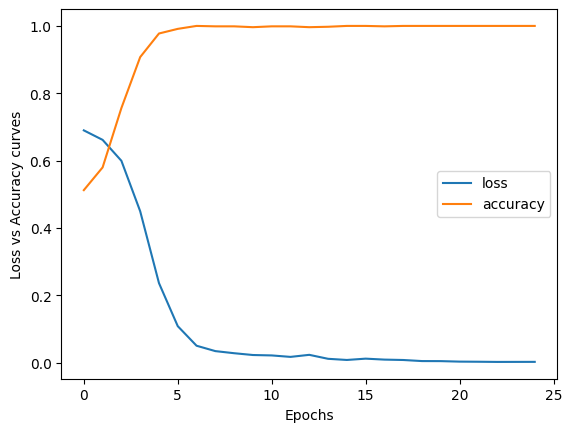

In [ ]:
#plot model fit history
pd.DataFrame(history_5.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss vs Accuracy curves')
plt.show()

## Finding the best Learning rate

- callback
-

In [ ]:
tf.random.set_seed=42

model_6 = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

callback_lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history_6 = model_6.fit(x_train, y_train, epochs=100, callbacks=[callback_lr])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7007 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6989 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5163 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

In [ ]:
model_6.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.7212 - accuracy: 0.4950


[0.7211857438087463, 0.4950000047683716]

<Axes: >

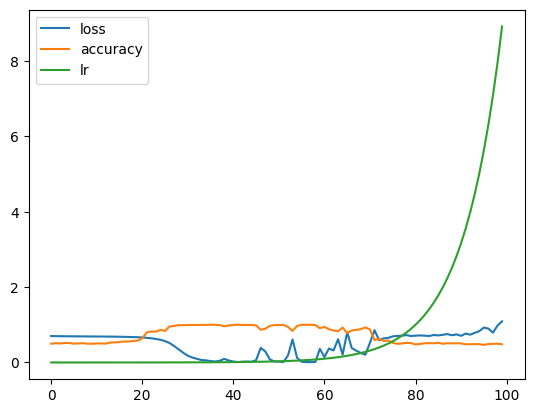

In [ ]:
pd.DataFrame(history_6.history).plot()

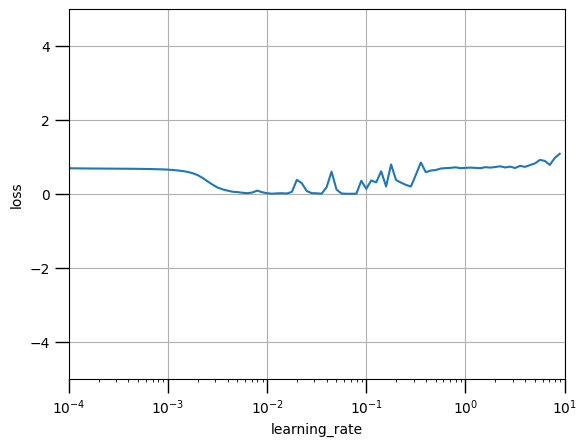

In [ ]:
lrs = 1e-4 * 10 **(tf.range(100)/20)

plt.semilogx(lrs, history_6.history['loss'])
plt.tick_params('both', length=10, width=1)
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.axis([1e-4, 1e+1, -5, 5])
plt.grid(True)
plt.show()


In [ ]:
#Examples of typical learning rates
10**0, 10**-1, 10**-2, 10**-3, 1e-4, 1e-3, 1e-2, 1e-1

(1, 0.1, 0.01, 0.001, 0.0001, 0.001, 0.01, 0.1)

## Train with identified best lr = 0.1

In [ ]:
tf.random.set_seed=42

model_7 = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(8e-3),
                metrics=['accuracy'])

#callback_lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history_7= model_7.fit(x_train, y_train, epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.5200
Epoch 2/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5888
Epoch 3/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7088
Epoch 4/15
25/25 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7812
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.9463
Epoch 6/15
25/25 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9737
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9712
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9825
Epoch 9/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9912
Epoch 10/15
25/25 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 1.0000
Epoch 11/15
25/25 [

313/313 [==============================] - 1s 4ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


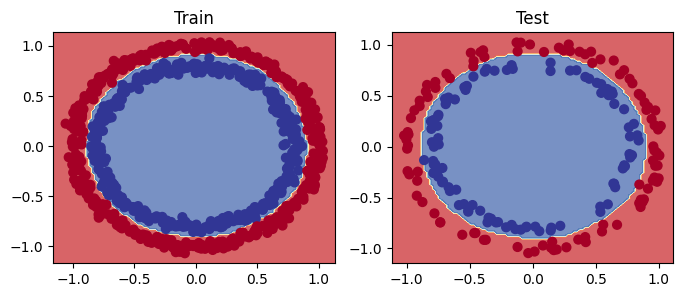

In [ ]:
model_7.evaluate(x_test, y_test)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_7, x_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_7, x_test, y_test)
plt.show()

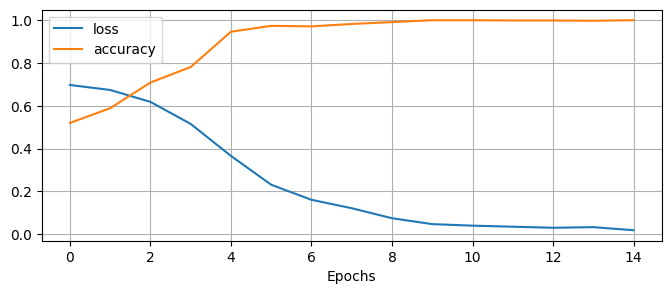

In [ ]:
pd.DataFrame(history_7.history).plot(figsize=(8,3), xlabel='Epochs', grid=True)
plt.show()

##Evaluation metrics

In [ ]:
loss, accuracy = model_7.evaluate(x_test, y_test)
print(f"Model loss: {loss}")
print(f"Model accuarcy: {accuracy}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 1.0000
Model loss: 0.019219081848859787
Model accuarcy: 1.0


###Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_7.predict(x_test)
print(y_pred[:2]) # prediction probabilities
print(y_test[:2]) # class


7/7 [==============================] - 0s 13ms/step
[[0.9954157]
 [0.9978631]]
[1 1]


In [ ]:
##we will just round the y_pred values which actually mimics after evaluation which is >0.5 pos else neg class
print(tf.round(y_pred)[:5])
ypred = tf.round(y_pred)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]], shape=(5, 1), dtype=float32)


In [ ]:
cm = confusion_matrix(y_test, ypred)
cm

array([[101,   0],
       [  0,  99]])

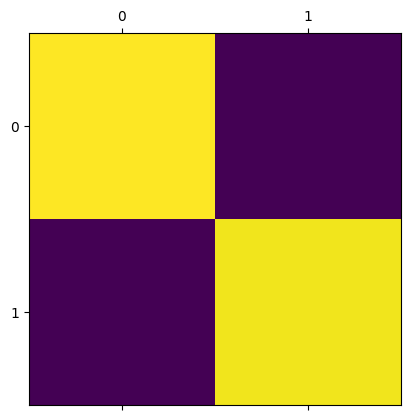

In [ ]:
plt.matshow(cm)

In [ ]:
cm.shape, type(cm)

((2, 2), numpy.ndarray)

In [ ]:
cm.ndim

2

In [ ]:
cm.sum(axis=0)

array([101,  99])

In [ ]:
cm.sum(axis=1)

array([101,  99])

In [ ]:
cm /cm.sum(axis=1)

array([[1., 0.],
       [0., 1.]])

In [ ]:
(cm /cm.sum(axis=1)[:np.newaxis]).shape

(2, 2)

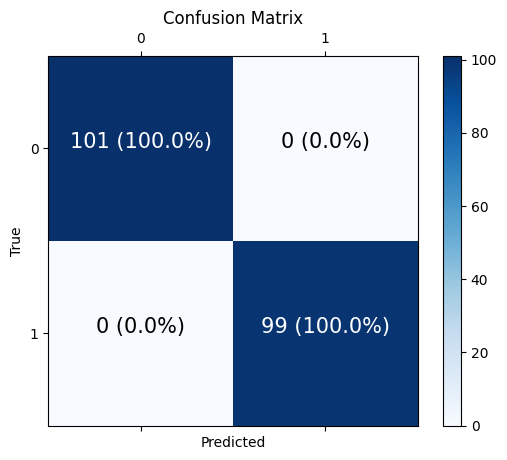

In [ ]:
import itertools
figsize=(10,10)

cm = confusion_matrix(y_test, ypred)
#cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm = cm.astype('float') / cm.sum(axis=1)
n_classes = cm.shape[0]

fig, ax = plt.subplots()
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes = False

if classes:
    labels=classes
else:
    #labels = np.arange(cm.shape[0])
    labels = np.arange(n_classes)

#label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted',
       ylabel='True',
       xticks=labels,
       yticks=labels,
       xticklabels=labels,
       yticklabels=labels)

#Set threshold for different colors
threshold = (cm.min() + cm.max())/2

# plot thetext
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15)

## sklearn ConfusionMatrixDisplay function

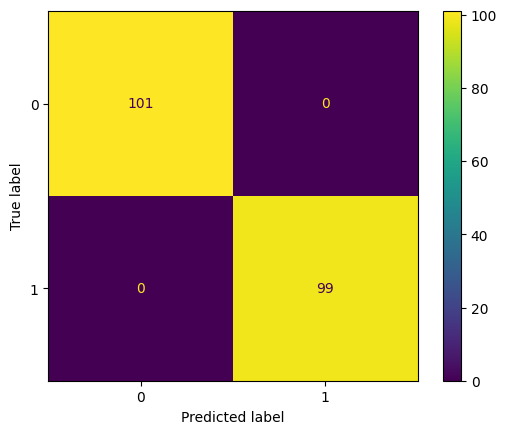

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

###defining the above confusion matrix custom display as a function

In [ ]:
def plot_confusion_matrix(cm):

    #normalize cm
    cm_normalized = cm / np.sum(cm, axis=1)
    n_classes = cm.shape[0]

    #plot cm
    fig, ax = plt.subplots()
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.colorbar(cax)

    #create classes
    classes=False

    if classes:
        labels=np.arange(classes)
    else:
        labels=np.arange(n_classes)

    #set axis definitions
    ax.set(title='Confusion Matrix',
           xlabel='Predicted',
           ylabel='True',
           xticks=labels,
           yticks=labels,
           xticklabels=labels,
           yticklabels=labels)

    #set thershold for text color
    threshold=(cm.min() + cm.max()) / 2

    #plot the text
    for i, j in itertools.product(range(cm.shape[0], cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_normalized[i, j]*100:.1f)}%)",
                ha='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=15)

    plt.show()

## Working with larger example

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [ ]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

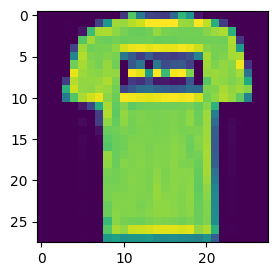

In [ ]:
plt.figure(figsize=(8,3))
plt.imshow(train_data[1])
plt.show()

In [ ]:
train_labels[1]

0

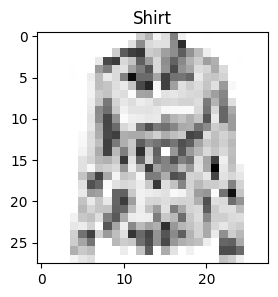

In [ ]:
#plot an example image and its label
plt.figure(figsize=(8,3))
index = np.random.randint(1, 1000)
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])
plt.show()

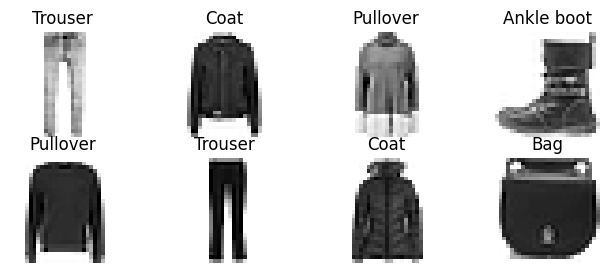

In [ ]:
#plot multiple ramdom images  of fashion mnist
import random
plt.figure(figsize=(8,3))
for i in range(8):
    ax=plt.subplot(2, 4, i+1)
    rand_index = random.choice(range(60000))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
    plt.tight_layout

What do you think, do we need a linear model or need some non-linearity also?

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

We will use sparse categorical crossentropy loss as our labels are sparse and not one-hot encoded

In [ ]:
tf.random.set_seed=42

model_8 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

model_8.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_8 = model_8.fit(train_data, train_labels,
                        epochs=10,
                        validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4089 - accuracy: 0.1113 - val_loss: 2.2702 - val_accuracy: 0.1145
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2717 - accuracy: 0.1129 - val_loss: 2.2983 - val_accuracy: 0.1022
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2995 - accuracy: 0.0986 - val_loss: 2.3037 - val_accuracy: 0.1008
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2837 - accuracy: 0.1119 - val_loss: 2.2859 - val_accuracy: 0.1074
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2573 - accuracy: 0.1227 - val_loss: 2.2429 - val_accuracy: 0.1247
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 2.2615 - accuracy: 0.1226 - val_loss: 2.2480 - val_accuracy: 0.1227
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2491 - accuracy: 0.1202 - val_loss: 2.2565 - val_accur

Using Categorical crossentropy loss, for which we would need to convert the labels to onehot encoded format

In [ ]:
tf.random.set_seed=42

model_9 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_9 = model_9.fit(train_data, tf.one_hot(train_labels, depth=10),
                        epochs=10,
                        validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 2.4610 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3040 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy

In [ ]:
model_9.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 100)               78500     
                                                                 
 dense_41 (Dense)            (None, 10)                1010      
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
#normalize data
train_data_norm = train_data/255.
test_data_norm = test_data/255.

In [ ]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

## Model with normalized data

In [ ]:
tf.random.set_seed=42

model_10 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

model_10.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5322 - accuracy: 0.8146 - val_loss: 0.4288 - val_accuracy: 0.8468
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3912 - accuracy: 0.8600 - val_loss: 0.4076 - val_accuracy: 0.8554
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3505 - accuracy: 0.8733 - val_loss: 0.4211 - val_accuracy: 0.8508
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3254 - accuracy: 0.8825 - val_loss: 0.3841 - val_accuracy: 0.8629
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3088 - accuracy: 0.8872 - val_loss: 0.3557 - val_accuracy: 0.8706
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2914 - accuracy: 0.8930 - val_loss: 0.3533 - val_accuracy: 0.8757
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2815 - accuracy: 0.8964 - val_loss: 0.3462 - val_accura

<Axes: title={'center': 'Normalized data'}>

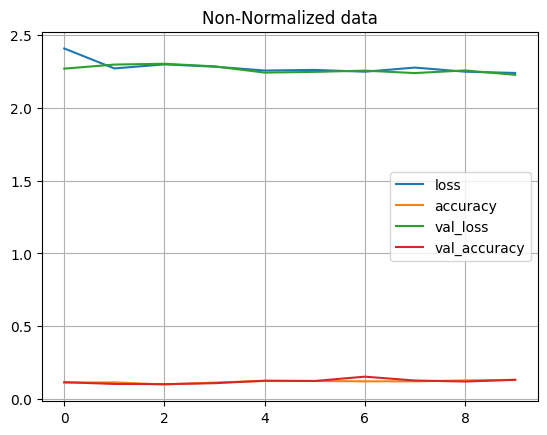

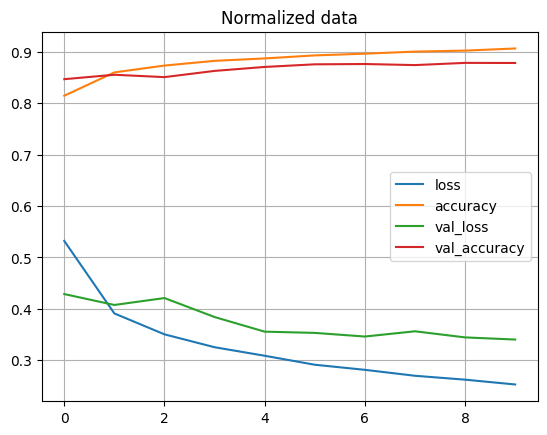

In [ ]:
pd.DataFrame(history_8.history).plot(title='Non-Normalized data', grid=True)
pd.DataFrame(history_10.history).plot(title='Normalized data', grid=True)


## find the best learning rate

In [ ]:
tf.random.set_seed=42

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

history_11 = model_11.fit(train_data_norm, train_labels,
             epochs=40,
             validation_data=(test_data_norm, test_labels),
             callbacks=[lr_scheduler])



Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1861 - accuracy: 0.5377 - val_loss: 0.8720 - val_accuracy: 0.6802 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7864 - accuracy: 0.7011 - val_loss: 0.7585 - val_accuracy: 0.7138 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7225 - accuracy: 0.7283 - val_loss: 0.7353 - val_accuracy: 0.7360 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6879 - accuracy: 0.7500 - val_loss: 0.7108 - val_accuracy: 0.7473 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6719 - accuracy: 0.7582 - val_loss: 0.7031 - val_accuracy: 0.7473 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6613 - accuracy: 0.7624 - val_loss: 0.7093 - val_accuracy: 0.7561 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

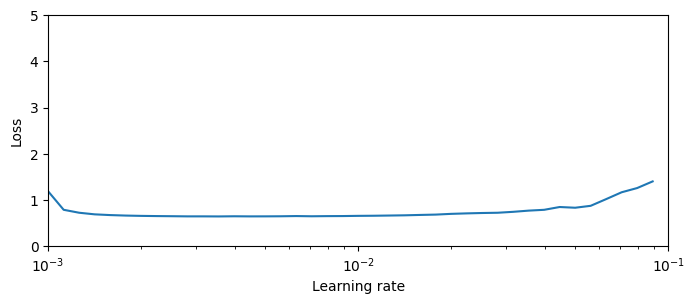

In [ ]:
#lrs = 1e-8*10**(tf.range(40)/20))
lrs=history_11.history['lr']
loss = history_11.history['loss']

plt.figure(figsize=(8, 3))
plt.semilogx(lrs, loss)
plt.axis([1e-3, 1e-1, 0, 5])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.show()

In [ ]:
10**-3, 2e-3

(0.001, 0.002)

In [ ]:
tf.random.set_seed=42


model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
                 metrics=['accuracy'])

history_12 = model_12.fit(train_data_norm, train_labels,
             epochs=15,
             validation_data=(test_data_norm, test_labels))

Epoch 1/15


Exception ignored in: <function _xla_gc_callback at 0x7ff4e51a0af0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1875/1875 [==============================] - 60s 3ms/step - loss: 1.0003 - accuracy: 0.6388 - val_loss: 0.7287 - val_accuracy: 0.7376
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6630 - accuracy: 0.7621 - val_loss: 0.6766 - val_accuracy: 0.7622
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6297 - accuracy: 0.7719 - val_loss: 0.7044 - val_accuracy: 0.7477
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6160 - accuracy: 0.7760 - val_loss: 0.6430 - val_accuracy: 0.7659
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6059 - accuracy: 0.7783 - val_loss: 0.6339 - val_accuracy: 0.7695
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5983 - accuracy: 0.7802 - val_loss: 0.6776 - val_accuracy: 0.7512
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5928 - accuracy: 0.7824 - val_loss: 0.6339 - val_accuracy: 0.7713
Ep

In [ ]:
model_12.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6095 - accuracy: 0.7934


[0.6095117330551147, 0.79339998960495]

In [ ]:
## evaluating our multi-class model
# Create a confusion model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#predict the probabilities from model
y_probs = model_12.predict(test_data_norm)

313/313 [==============================] - 0s 1ms/step


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[test_labels[9]]

(array([6.5624750e-05, 8.6564406e-16, 5.8482580e-11, 7.2385315e-06,
        2.0202504e-09, 3.1802502e-01, 1.2553042e-05, 5.9803497e-02,
        2.6564966e-03, 6.1942953e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Sneaker')

In [ ]:
y_preds = tf.argmax(y_probs, axis=1)

In [ ]:
y_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 2, 1, 4, 6, 5, 7])>

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
tf.expand_dims(y_preds, -1).shape

TensorShape([10000, 1])

In [ ]:
cm = confusion_matrix(test_labels, y_preds)

In [ ]:
cm

array([[712,   5,  45,  89,   3,   2, 128,   1,  15,   0],
       [  1, 945,   9,  34,   9,   0,   1,   0,   1,   0],
       [  9,   1, 702,  13, 205,   0,  65,   0,   5,   0],
       [ 38,  32,  71, 784,  35,   1,  34,   0,   5,   0],
       [  1,   9, 143,  13, 786,   1,  42,   0,   5,   0],
       [  0,   0,   0,   1,   0, 926,   0,  30,  16,  27],
       [135,   9, 208,  49, 197,   0, 369,   0,  33,   0],
       [  0,   0,   0,   0,   0,  89,   0, 853,   0,  58],
       [  5,   1,  14,   5,   2,  13,  18,   3, 938,   1],
       [  0,   0,   0,   0,   0,  40,   0,  36,   5, 919]])

In [ ]:
import itertools
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), textsize=15):

    # generate cm
    cm = confusion_matrix(y_true, y_pred)
    #normalize cm
    cm_normalized = cm / np.sum(cm, axis=1)
    n_classes = cm.shape[0]

    #plot cm
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.colorbar(cax)

    #create classes

    if classes:
        labels=classes
    else:
        labels=np.arange(n_classes)

    #set axis definitions
    ax.set(title='Confusion Matrix',
           xlabel='Predicted',
           ylabel='True',
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    #make xaxis ticks at the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #set thershold for text color
    threshold=(cm.min() + cm.max()) / 2.

    #plot the text
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_normalized[i, j]*100:.1f})%)",
                ha='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=textsize)

    plt.show()



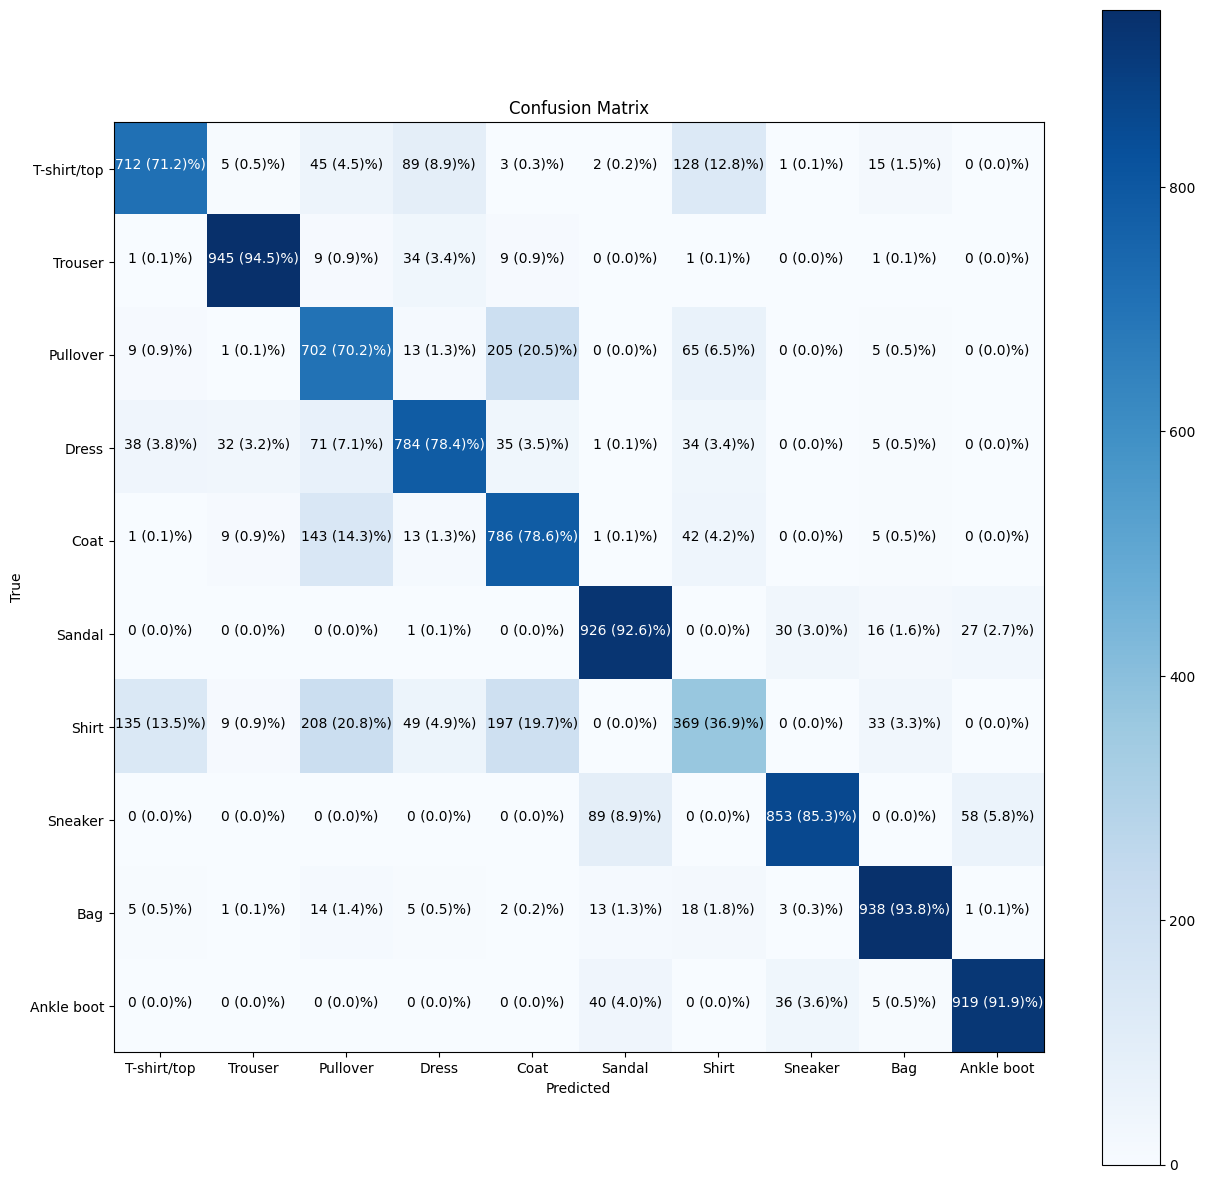

In [ ]:

plot_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      textsize=10)

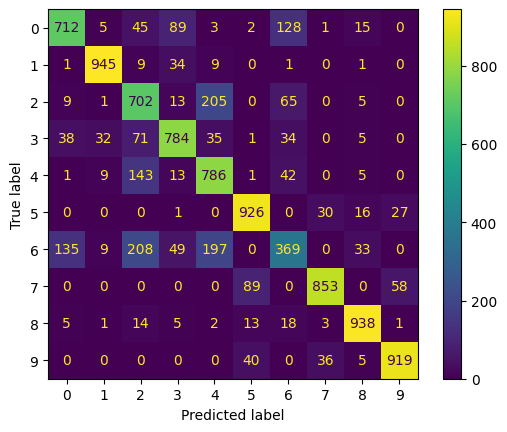

In [ ]:
disp= ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):

    i = random.randint(0, len(images))

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    #plot
    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label==true_label:
        color='green'

    else:
        color='red'

    plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True:{true_label})", color=color)

1/1 [==============================] - 0s 17ms/step


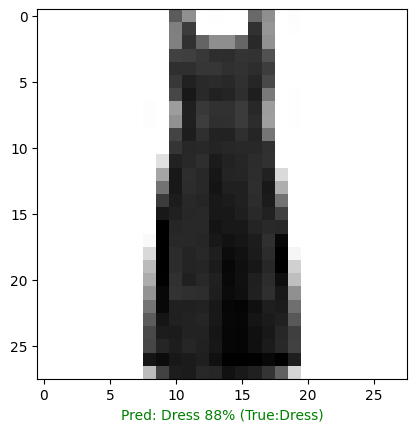

In [ ]:
plot_random_image(model=model_12, images=test_data_norm, true_labels=test_labels, classes=class_names)

##Understand Patterns

In [ ]:
model_12.layers

In [ ]:
model_12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


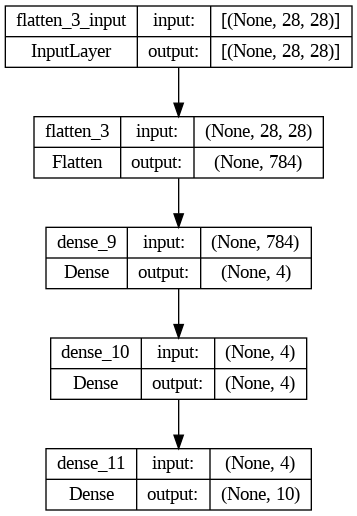

In [ ]:
tf.keras.utils.plot_model(model_12, show_shapes=True, show_layer_names=True)

In [ ]:
model_12.layers[1]

In [ ]:
weights, biases = model_12.layers[1].get_weights()

In [ ]:
#shapes
weights, weights.shape,

(array([[-0.09654386,  0.07053258, -0.38288596,  0.11146971],
        [-0.751502  ,  0.07540292,  1.1367388 , -0.3926051 ],
        [-0.67007357, -0.03738789, -1.1963805 ,  0.06133413],
        ...,
        [-0.43215916,  0.0629932 ,  0.4419592 , -0.5751453 ],
        [ 0.17361814,  0.0548387 ,  0.38110447, -1.7321024 ],
        [ 0.2447243 ,  0.07853986, -0.568659  ,  0.20551196]],
       dtype=float32),
 (784, 4))

In [ ]:
biases, biases.shape

(array([ 2.114453  , -0.01239214,  2.8038244 ,  2.3635602 ], dtype=float32),
 (4,))